# Pyber Ride Sharing

Analysis:

The app is definitely primarily used in Urban areas, as a solid majority of both drivers and rides occur in urban areas. This makes sense as people in suburban and rural areas are far more likely to use their own transportation, and the lower population density naturally leads to less available drivers.

There appears to be a bit of over-saturation of drivers in the Urban areas, as their market share for Total Drivers is 10-15 percentage points higher than their share of total rides and total fees, respectively. This likely results in much fewer rides per driver in Urban areas compared to suburban and rural areas, so those drivers are not going to see the same level of income as drivers in other areas.

While the Rural areas have far fewer drivers than the Suburban and Urban areas, they are much more likely to have higher average fees per ride, likely due to an increase in average distance required to drive. While the Urban areas by far have the highest number of drivers, the short trips around the inner city cause the average fees to stay relatively low. The suburban areas hang in the middle of the pack for both measures.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Bubble Plot that showcases:
#     Average Fare ($) Per City
#     Total Number of Rides Per City
#     Total Number of Drivers Per City
#     City Type (Urban, Suburban, Rural)

# Read City and Ride data into dataframe
city_df = pd.read_csv("city_data.csv")
ride_df = pd.read_csv("ride_data.csv")

# Create an object to group the Ride data by city
ride_by_city = ride_df.groupby("city")

# Determine Avg Fare per city
avg_fare = pd.DataFrame(round(ride_by_city["fare"].mean(),2))
avg_fare.columns = ["Average Fare"]
avg_fare.reset_index(inplace=True)

# Determine Total Rides per city
tot_rides = pd.DataFrame(ride_df["city"].value_counts())
tot_rides.reset_index(inplace=True)
tot_rides.columns = ['city', 'Total Rides']

# Determind Total Fare per city (for Pie Chart later)
tot_fares = ride_by_city.sum()
tot_fares.reset_index(inplace=True)
tot_fares = tot_fares[["city","fare"]]
tot_fares.columns = ["city","Total Fare"]

# Merge dataframes
city_df = pd.merge(city_df,avg_fare,on="city")
city_df = pd.merge(city_df,tot_rides,on="city")
city_df = pd.merge(city_df,tot_fares,on="city")

# Check table to make sure it's good
city_df.head()

,city,driver_count,type,Average Fare,Total Rides,Total Fare
0,Kelseyland,63,Urban,21.81,28,610.58
1,Nguyenbury,8,Urban,25.90,26,673.39
2,East Douglas,12,Urban,26.17,22,575.72
3,West Dawnfurt,34,Urban,22.33,29,647.58
4,Rodriguezburgh,52,Urban,21.33,23,490.65


# Bubble Plot of Ridesharing Data

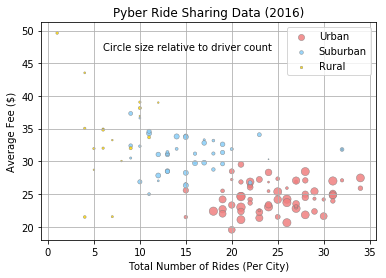

In [3]:
city_types = ["Urban","Suburban","Rural"]
color_dict = {"Urban":"lightcoral","Suburban":"lightskyblue","Rural":"gold"}

for c_type in city_types:
    
    sub_df = city_df.loc[city_df["type"]==c_type,:]    
    
    plt.scatter(x=sub_df["Total Rides"],
                y=sub_df["Average Fare"],
                s=sub_df["driver_count"],
                c=color_dict[c_type],
                alpha=0.85,
                linewidths=0.5,
                edgecolor="grey",
                marker="o",
                label=c_type)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fee ($)")

plt.legend()
plt.grid()
plt.text(6,47,"Circle size relative to driver count")

plt.show()

# Total Fares by City Type

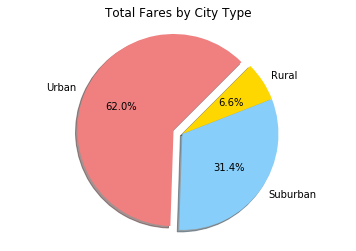

In [4]:
# Create Pie Chart for % of Total Fares by City Type

colors = ["lightcoral","lightskyblue","gold"]

by_type = city_df.groupby("type")
fares_by_type = pd.DataFrame(by_type["Total Fare"].sum())
fares_by_type = fares_by_type.iloc[::-1]

plt.pie(fares_by_type,
        labels=city_types,
        colors=colors,
        shadow=True,
        startangle=45,
        explode=(0.1,0,0),
        autopct="%1.1f%%")

plt.axis("equal")

plt.title("Total Fares by City Type")

plt.show()

# Total Rides by City Type

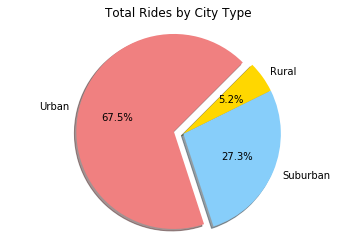

In [5]:
# Create Pie Chart for % of Total Rides by City Type

rides_by_type = pd.DataFrame(by_type["Total Rides"].sum())
rides_by_type = rides_by_type.iloc[::-1]

plt.pie(rides_by_type,
        labels=city_types,
        colors=colors,
        shadow=True,
        startangle=45,
        explode=(0.1,0,0),
        autopct="%1.1f%%")

plt.axis("equal")

plt.title("Total Rides by City Type")

plt.show()

# Total Drivers by City Type

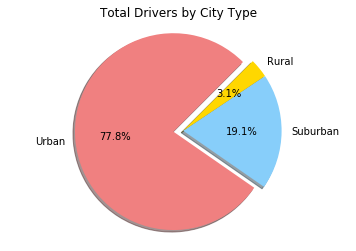

In [6]:
# Create Pie Chart for Total Drivers by City Type

tot_drivers = by_type.sum()
tot_drivers = tot_drivers.iloc[::-1]

plt.pie(tot_drivers["driver_count"],
        labels=city_types,
        colors=colors,
        startangle=45,
        explode=(0.1,0,0),
        shadow=True,
        autopct="%1.1f%%")

plt.axis("equal")

plt.title("Total Drivers by City Type")

plt.show()